## EDA & Modeling

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor

from sklearn import metrics

In [51]:
data = pd.read_csv('../data/cleaned_cdc_2020.csv')
df = pd.DataFrame(data = data)
print(df.shape)
df.head()

(76860, 9)


,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,GeoLocation,QuestionID,StratificationCategoryId1,StratificationID1
0,2012,WY,Wyoming,48.5,69.0,"(43.235541343, -108.109830353)",Q037,RACE,RACENAA
1,2012,DC,District of Columbia,31.6,243.0,"(38.890371385, -77.031961127)",Q036,EDU,EDUHS
2,2011,AL,Alabama,35.2,598.0,"(32.840571122, -86.631860762)",Q036,AGEYR,AGEYR2534
3,2015,RI,Rhode Island,40.2,354.0,"(41.708280193, -71.522470314)",Q037,RACE,RACEHIS
4,2012,WY,Wyoming,32.3,484.0,"(43.235541343, -108.109830353)",Q047,INC,INCLESS15


In [52]:
df = df[df['QuestionID'].isin(['Q036', 'Q037'])]
df.shape

(28504, 9)

In [17]:
# list of question id
qid_list = ['Q036', 'Q037'] #, 'Q047', 'Q019', 'Q043', 'Q044', 'Q045', 'Q045', 'Q018']

# list of stratification categories (diff than stratification id)
strat_cat_list = ['RACE', 'INC', 'AGEYR', 'EDU', 'GEN', 'OVR']

In [19]:
def strat_qid(strat_cat, qid):
    strat = df[df['StratificationCategoryId1'] == strat_cat][['YearStart', 'LocationDesc','Data_Value', 'QuestionID', 'StratificationID1']]
    question = strat[strat['QuestionID'] == qid][['YearStart', 'LocationDesc','Data_Value', 'QuestionID', 'StratificationID1']]
    return question

In [49]:
race036 = strat_qid('RACE', 'Q036')
race036.head()

,YearStart,LocationDesc,Data_Value,QuestionID,StratificationID1
5,2011,Rhode Island,32.10,Q036,RACEOTH
17,2016,Washington,29.10,Q036,RACEWHT
37,2017,West Virginia,35.27,Q036,RACEHPI
46,2016,Kansas,30.50,Q036,RACEWHT
50,2016,Maine,20.16,Q036,RACEASN


In [50]:
race036 = race036.sort_values(by = ['YearStart'])
ca_race036 = race036.loc[race036['LocationDesc'] == 'California'].loc[race036['StratificationID1'] == 'RACE2PLUS']
ca_race036

,YearStart,LocationDesc,Data_Value,QuestionID,StratificationID1
40916,2011,California,26.9,Q036,RACE2PLUS
17275,2012,California,28.8,Q036,RACE2PLUS
54799,2013,California,33.8,Q036,RACE2PLUS
17831,2014,California,28.6,Q036,RACE2PLUS
34104,2015,California,26.6,Q036,RACE2PLUS
59191,2016,California,29.4,Q036,RACE2PLUS
27387,2017,California,37.7,Q036,RACE2PLUS
2758,2018,California,24.8,Q036,RACE2PLUS
71260,2019,California,27.1,Q036,RACE2PLUS
62407,2020,California,26.0,Q036,RACE2PLUS


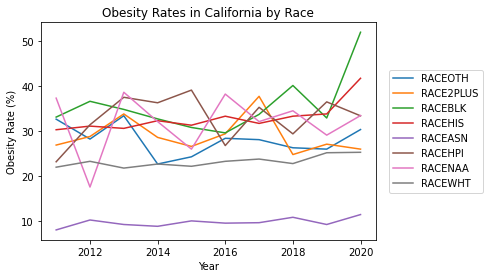

In [23]:
for race in race036['StratificationID1'].unique():
    ca_race036 = race036.loc[race036['LocationDesc'] == 'California'].loc[race036['StratificationID1'] == race]
    plt.plot(ca_race036['YearStart'], ca_race036['Data_Value'], label = race)
    plt.title('Obesity Rates in California by Race')
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.ylabel('Obesity Rate (%)')
    plt.xlabel('Year');

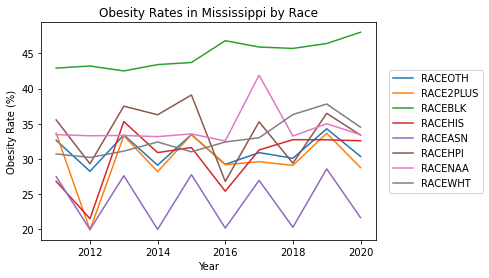

In [24]:
for race in race036['StratificationID1'].unique():
    mi_race036 = race036.loc[race036['LocationDesc'] == 'Mississippi'].loc[race036['StratificationID1'] == race]
    plt.plot(mi_race036['YearStart'], mi_race036['Data_Value'], label = race)
    plt.title('Obesity Rates in Mississippi by Race')
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.ylabel('Obesity Rate (%)')
    plt.xlabel('Year');

In [25]:
edu036 = strat_qid('EDU', 'Q036')
edu036 = edu036.sort_values(by = ['YearStart'])
edu036

,YearStart,LocationDesc,Data_Value,QuestionID,StratificationID1
20675,2011,Montana,20.2,Q036,EDUCOGRAD
43371,2011,Alaska,33.1,Q036,EDUHSGRAD
43087,2011,New Hampshire,29.3,Q036,EDUHSGRAD
42573,2011,Massachusetts,24.1,Q036,EDUCOTEC
22819,2011,Florida,21.1,Q036,EDUCOGRAD
...,...,...,...,...,...
62530,2020,Wisconsin,38.3,Q036,EDUHS
62510,2020,Oregon,29.8,Q036,EDUHSGRAD
62438,2020,Connecticut,35.0,Q036,EDUHSGRAD
62714,2020,Alabama,36.1,Q036,EDUCOGRAD


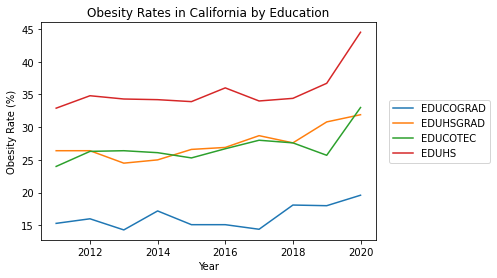

In [26]:
for edu in edu036['StratificationID1'].unique():
    ca_edu036 = edu036.loc[edu036['LocationDesc'] == 'California'].loc[edu036['StratificationID1'] == edu]
    plt.plot(ca_edu036['YearStart'], ca_edu036['Data_Value'], label = edu)
    plt.title('Obesity Rates in California by Education')
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.ylabel('Obesity Rate (%)')
    plt.xlabel('Year');

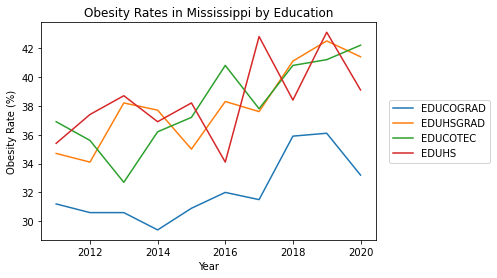

In [27]:
for edu in edu036['StratificationID1'].unique():
    mi_edu036 = edu036.loc[edu036['LocationDesc'] == 'Mississippi'].loc[edu036['StratificationID1'] == edu]
    plt.plot(mi_edu036['YearStart'], mi_edu036['Data_Value'], label = edu)
    plt.title('Obesity Rates in Mississippi by Education')
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.ylabel('Obesity Rate (%)')
    plt.xlabel('Year');

In [28]:
gen036 = strat_qid('GEN', 'Q036').sort_values(by = ['YearStart'])
gen036

,YearStart,LocationDesc,Data_Value,QuestionID,StratificationID1
22427,2011,California,24.5,Q036,FEMALE
53934,2011,Wisconsin,26.1,Q036,FEMALE
32016,2011,Wyoming,23.8,Q036,FEMALE
32236,2011,District of Columbia,28.4,Q036,FEMALE
18797,2011,Georgia,29.3,Q036,FEMALE
...,...,...,...,...,...
62863,2020,Wyoming,31.4,Q036,FEMALE
62871,2020,Massachusetts,25.4,Q036,MALE
63003,2020,California,29.8,Q036,FEMALE
62529,2020,West Virginia,40.6,Q036,MALE


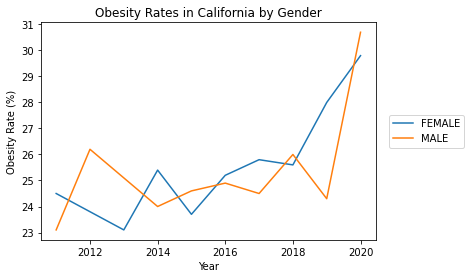

In [29]:
for gen in gen036['StratificationID1'].unique():
    ca_gen036 = gen036.loc[gen036['LocationDesc'] == 'California'].loc[gen036['StratificationID1'] == gen]
    plt.plot(ca_gen036['YearStart'], ca_gen036['Data_Value'], label = gen)
    plt.title('Obesity Rates in California by Gender')
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.ylabel('Obesity Rate (%)')
    plt.xlabel('Year');

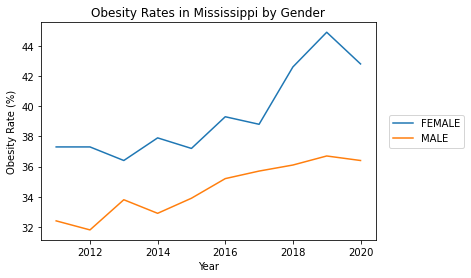

In [30]:
for gen in gen036['StratificationID1'].unique():
    mi_gen036 = gen036.loc[gen036['LocationDesc'] == 'Mississippi'].loc[gen036['StratificationID1'] == gen]
    plt.plot(mi_gen036['YearStart'], mi_gen036['Data_Value'], label = gen)
    plt.title('Obesity Rates in Mississippi by Gender')
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.ylabel('Obesity Rate (%)')
    plt.xlabel('Year');

In [31]:
inc036 = strat_qid('INC', 'Q036').sort_values(by = ['YearStart'])
inc036

,YearStart,LocationDesc,Data_Value,QuestionID,StratificationID1
13696,2011,Iowa,33.8,Q036,INC1525
13838,2011,Virginia,25.2,Q036,INC5075
30002,2011,South Carolina,35.8,Q036,INC1525
13656,2011,Kansas,24.4,Q036,INCNR
39379,2011,New Hampshire,24.2,Q036,INC2535
...,...,...,...,...,...
62889,2020,Alaska,46.4,Q036,INC2535
62933,2020,Vermont,28.3,Q036,INC5075
62941,2020,Nebraska,37.5,Q036,INC3550
62568,2020,Ohio,38.7,Q036,INC2535


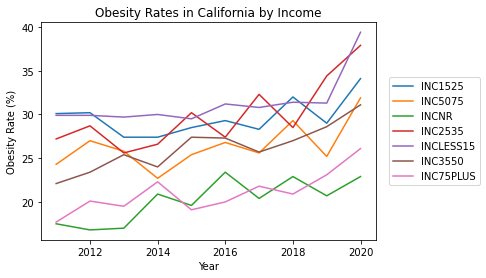

In [32]:
for inc in inc036['StratificationID1'].unique():
    ca_inc036 = inc036.loc[inc036['LocationDesc'] == 'California'].loc[inc036['StratificationID1'] == inc]
    plt.plot(ca_inc036['YearStart'], ca_inc036['Data_Value'], label = inc)
    plt.title('Obesity Rates in California by Income')
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.ylabel('Obesity Rate (%)')
    plt.xlabel('Year');

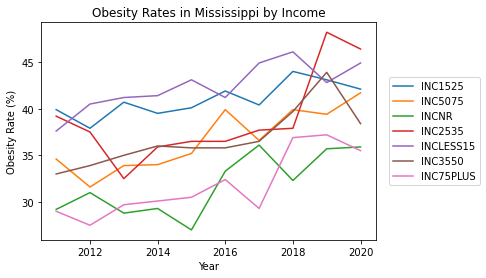

In [33]:
for inc in inc036['StratificationID1'].unique():
    mi_inc036 = inc036.loc[inc036['LocationDesc'] == 'Mississippi'].loc[inc036['StratificationID1'] == inc]
    plt.plot(mi_inc036['YearStart'], mi_inc036['Data_Value'], label = inc)
    plt.title('Obesity Rates in Mississippi by Income')
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0)
    plt.ylabel('Obesity Rate (%)')
    plt.xlabel('Year');

In [34]:
ovr036 = strat_qid('OVR', 'Q036').sort_values(by = ['YearStart'])
ovr036

,YearStart,LocationDesc,Data_Value,QuestionID,StratificationID1
15098,2011,Michigan,31.3,Q036,OVERALL
49700,2011,West Virginia,32.4,Q036,OVERALL
49729,2011,Hawaii,21.8,Q036,OVERALL
24038,2011,New York,24.5,Q036,OVERALL
37196,2011,Oregon,26.7,Q036,OVERALL
...,...,...,...,...,...
62178,2020,North Dakota,33.1,Q036,OVERALL
62132,2020,Louisiana,38.1,Q036,OVERALL
62054,2020,Nebraska,34.0,Q036,OVERALL
64096,2020,Mississippi,39.7,Q036,OVERALL


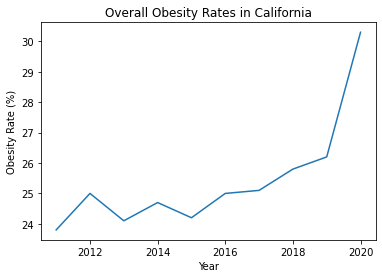

In [35]:
ca_ovr036 = ovr036.loc[ovr036['LocationDesc'] == 'California'].loc[ovr036['StratificationID1'] == 'OVERALL']
plt.plot(ca_ovr036['YearStart'], ca_ovr036['Data_Value'], label = 'OVR')
plt.title('Overall Obesity Rates in California')
plt.ylabel('Obesity Rate (%)')
plt.xlabel('Year');

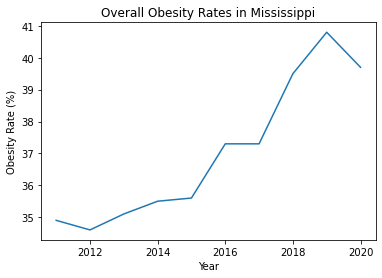

In [36]:
mi_ovr036 = ovr036.loc[ovr036['LocationDesc'] == 'Mississippi'].loc[ovr036['StratificationID1'] == 'OVERALL']
plt.plot(mi_ovr036['YearStart'], mi_ovr036['Data_Value'], label = 'OVR')
plt.title('Overall Obesity Rates in Mississippi')
plt.ylabel('Obesity Rate (%)')
plt.xlabel('Year');

In [37]:
# prints df with varying question id and stratification category parameters
for qid in qid_list:
    for strat in strat_cat_list:
        print(strat_qid(strat, qid))

       YearStart    LocationDesc  Data_Value QuestionID StratificationID1
5           2011    Rhode Island       32.10       Q036           RACEOTH
17          2016      Washington       29.10       Q036           RACEWHT
37          2017   West Virginia       35.27       Q036           RACEHPI
46          2016          Kansas       30.50       Q036           RACEWHT
50          2016           Maine       20.16       Q036           RACEASN
...          ...             ...         ...        ...               ...
75153       2019     Mississippi       34.99       Q036           RACENAA
75190       2019    Rhode Island       36.47       Q036           RACEHPI
75205       2019  North Carolina       36.47       Q036           RACEHPI
75217       2019      Washington       19.90       Q036           RACEOTH
75288       2019           Idaho       28.58       Q036           RACEASN

[4072 rows x 5 columns]
       YearStart  LocationDesc  Data_Value QuestionID StratificationID1
27          201

---
# GridSearch
---

In [40]:
#X = df[['LocationAbbr', 'StratificationID1']]
#y = df['Data_Value']
sorted_df = df.sort_values('YearStart')
sorted_df = pd.get_dummies(sorted_df, columns = ['LocationAbbr', 'QuestionID', 'StratificationID1'], drop_first = True)
X = sorted_df.drop(columns = ['Data_Value', 'LocationDesc', 'Sample_Size', 'GeoLocation', 'StratificationCategoryId1'])
y = sorted_df['Data_Value']

In [42]:
X.shape

(28504, 79)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [44]:
knn_pipe = Pipeline([
    ('knn', KNeighborsRegressor())
])
params = [{'knn__n_neighbors': [3, 5, 7, 9],}]
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)
gs_knn.fit(X_train, y_train)
gs_knn.best_params_

C:\Users\sbhew\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\sbhew\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\sbhew\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\sbhew\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\sbhew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "C:\Users\sbhew\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 104, in _check_targets
    raise

{'knn__n_neighbors': 3}

In [45]:
gs_knn.best_score_

nan

In [46]:
# Pipelines from survey code
def model(model):
    models = model
    models.fit(X_train, y_train)
    print(f'{model}')
    print(f'Training r2 score: {models.score(X_train, y_train)}')
    print(f'Testing r2 score: {models.score(X_test, y_test)}')
    print(f'Testing MSE: {metrics.mean_squared_error(y_test, models.predict(X_test))}')
    return print('='*40)

In [47]:
model(LinearRegression())
model(KNeighborsRegressor())
model(DecisionTreeRegressor())
model(BaggingRegressor())
model(RandomForestRegressor())
model(AdaBoostRegressor())

LinearRegression()
Training r2 score: 0.45622634835289777
Testing r2 score: 0.4174314248164147
Testing MSE: 23.365853581550432
KNeighborsRegressor()
Training r2 score: 0.5348649307927138
Testing r2 score: 0.29843115998488123
Testing MSE: 28.13875566152119
DecisionTreeRegressor()
Training r2 score: 1.0
Testing r2 score: 0.34224172994540447
Testing MSE: 26.381586794835812
BaggingRegressor()
Training r2 score: 0.9349051618219079
Testing r2 score: 0.5811025018493227
Testing MSE: 16.80127975385911
RandomForestRegressor()
Training r2 score: 0.9498756892454063
Testing r2 score: 0.606311320688569
Testing MSE: 15.790196089114508
AdaBoostRegressor()
Training r2 score: 0.23950289898611266
Testing r2 score: 0.22131584265258641
Testing MSE: 31.231722378981665


<AxesSubplot:>

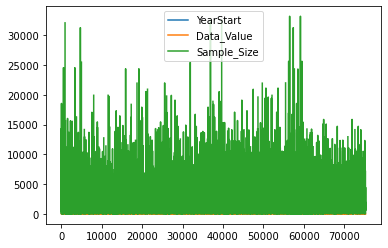

In [48]:
df.plot()